Data Normalization


In [46]:
from datetime import datetime
from dataclasses import dataclass

@dataclass
class Tick:
    timestamp: int
    open: float
    high: float
    low: float
    close: float
    average: float
    volume: float
    trade_count: int



import json
with open('../data/sol-1month-by-1minute.json', 'r') as file:
    data = json.load(file)

raw_ticks: list[list[str | int]] = data.get('result').get('SOLUSD')
ticks:list[Tick] = list()
for raw_tick in raw_ticks:
    new_tick = Tick(raw_tick[0],float(raw_tick[1]),float(raw_tick[2]),float(raw_tick[3]),float(raw_tick[4]),float(raw_tick[5]),float(raw_tick[6]),raw_tick[7])
    if(new_tick.average == 0):
        new_tick.average = new_tick.open
    ticks.append(new_tick)

Compute SMA


In [47]:
from math import floor

def simple_moving_avg(max_kernal_len:int,data:list[float]) -> list[float]:
    moving_avg = list()
    # todo handle start and end 
    for data_index in range(0,data.__len__()):
        kernal_len = min(data_index+1,data.__len__()-data_index,max_kernal_len)
        simulated_kernal_val = 1/kernal_len;
        avg = 0
        for kernal_index in range(0,kernal_len):
            half_kernal_len = floor(0.5*kernal_len)
            index = data_index-half_kernal_len+kernal_index
            avg += data[index]*simulated_kernal_val
        moving_avg.append(avg)
    return moving_avg




Detecting support and resistance

177.36
249


<Axes: >

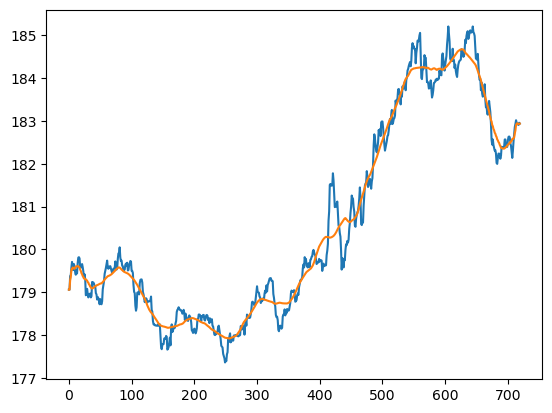

In [51]:
import seaborn

avg_prices = [tick.average for tick in ticks]
min_price = 2000;
min_index = -1;
for i in range(0,ticks.__len__()):
    if(ticks[i].average < min_price):
        min_price = ticks[i].average
        min_index = i;

print(min_price)
print(min_index)
# sma = simple_moving_avg(6,avg_prices)

seaborn.lineplot(avg_prices)
seaborn.lineplot(simple_moving_avg(50,avg_prices))